In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk

from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression

In [2]:
df = pd.read_csv("car_data.csv")
insured = df.copy()

# Data preprocessing
## Data cleaning

In [3]:
insured.head()
# engineV = engine volume/capacity = in liters

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
print(insured.isna().sum())
print(insured.info())
print(insured.describe())

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB
None
               Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4195.000000  4345.000000
mean    19418.746935   161.237284     2

In [5]:
# Removing records having null values
insured.dropna(inplace=True)
print(insured.isna().sum())
print(insured.info())
print(insured.describe())

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB
None
               Price      Mileage      EngineV         Year
count    4025.000000  4025.000000  4025.000000  4025.000000
mean    19552.308065   163.572174     2.764586  2006.379627
st

In [6]:
# removing records where mileage = 0
insured = insured[insured["Mileage"] != 0]
print(insured.describe())
print(insured.info())

               Price      Mileage      EngineV         Year
count    3878.000000  3878.000000  3878.000000  3878.000000
mean    17417.471423   169.772563     2.767581  2006.020113
std     21599.147081   100.214150     5.023970     6.556247
min       600.000000     1.000000     0.600000  1969.000000
25%      6900.000000    98.250000     1.800000  2002.000000
50%     10999.000000   161.000000     2.200000  2007.000000
75%     20300.000000   232.000000     3.000000  2011.000000
max    300000.000000   980.000000    99.990000  2016.000000
<class 'pandas.core.frame.DataFrame'>
Index: 3878 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3878 non-null   object 
 1   Price         3878 non-null   float64
 2   Body          3878 non-null   object 
 3   Mileage       3878 non-null   int64  
 4   EngineV       3878 non-null   float64
 5   Engine Type   3878 non-null   object 
 6   Registrati

## Data Transformation

In [7]:
print(insured["Brand"].unique())
print(insured["Body"].unique())
print(insured["Engine Type"].unique())
print(insured["Registration"].unique())
# print(insured["Year"].unique())
print(insured["Model"].unique())

['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']
['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']
['Petrol' 'Diesel' 'Gas' 'Other']
['yes' 'no']
['320' 'Sprinter 212' 'S 500' 'Q7' 'Rav 4' 'A6' 'Megane' 'Golf IV' '19'
 'A6 Allroad' 'Passat B6' 'Land Cruiser 100' 'Clio' '318' 'Polo'
 'Outlander' 'A8' 'Touareg' 'Vito' 'Colt' '100' 'Z4' 'Pajero Wagon' 'X5'
 'Caddy' 'Camry' '528' 'TT' 'G 55 AMG' 'X6' 'Galant' '525' 'Kangoo'
 'ML 350' '730' 'Trafic' 'X5 M' 'S 350' 'Lancer' 'E-Class' 'Scenic' '330'
 'Passat B5' 'A3' 'Land Cruiser Prado' 'Caravelle' 'Avensis' 'GL 320'
 'GL 450' 'Lancer X' '200' '520' 'Tiguan' 'Outlander XL' 'A5' 'X6 M'
 'Golf III' 'A 150' 'FJ Cruiser' 'Koleos' 'Passat B7' 'Scirocco' 'M5'
 'Venza' '80' 'ML 270' 'C-Class' 'Lupo' '5 Series' 'CLA 200'
 'T5 (Transporter)' 'Highlander' 'Corolla' 'CLK 240' 'I3' 'Multivan'
 'Vaneo' 'X1' 'T5 (Transporter) ' 'S 400' 'S 550' 'Passat CC' 'A4 Allroad'
 'Passat B4' 'Golf II' 'Land Cruiser 200' 'L 200' 'Jetta' '

In [8]:
insured.groupby("Model")["Model"].count()

Model
1 Series     1
100         17
11           1
116          3
118          4
            ..
X6          35
X6 M         3
Yaris       13
Z3           1
Z4           5
Name: Model, Length: 299, dtype: int64

In [9]:
# type conversion
insured["Brand"] = insured["Brand"].astype("category")
insured["Body"] = insured["Body"].astype("category")
insured["Engine Type"] = insured["Engine Type"].astype("category")
insured["Registration"] = insured["Registration"].astype("category")
insured["Model"] = insured["Model"].astype("category")
print(insured.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3878 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Brand         3878 non-null   category
 1   Price         3878 non-null   float64 
 2   Body          3878 non-null   category
 3   Mileage       3878 non-null   int64   
 4   EngineV       3878 non-null   float64 
 5   Engine Type   3878 non-null   category
 6   Registration  3878 non-null   category
 7   Year          3878 non-null   int64   
 8   Model         3878 non-null   category
dtypes: category(5), float64(2), int64(2)
memory usage: 185.5 KB
None


In [10]:
notencoded = insured.copy()
insured[insured["Registration"] == 'no']

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV
16,BMW,2990.0,other,203,2.0,Petrol,no,2001,318
19,Audi,3500.0,vagon,250,2.5,Diesel,no,1998,A6
27,Mercedes-Benz,13566.0,other,171,2.2,Other,no,2011,Vito
57,Volkswagen,5000.0,vagon,265,2.0,Diesel,no,2006,Passat B6
...,...,...,...,...,...,...,...,...,...
4279,Audi,2850.0,vagon,280,2.5,Diesel,no,1999,A6
4282,Volkswagen,6500.0,sedan,74,2.0,Petrol,no,2011,Jetta
4292,BMW,15500.0,sedan,89,2.0,Diesel,no,2012,520
4304,BMW,4300.0,sedan,200,2.0,Diesel,no,2002,320


## EDA

In [11]:
# encoding just for EDA and then feature selection
oe = OrdinalEncoder()
cat_cols = ["Brand","Body","Engine Type","Registration","Model"]
insured[cat_cols] = oe.fit_transform(insured[cat_cols]).astype("int")
insured[insured["Registration"] == 0]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
9,6,1400.0,2,212,1.8,1,0,1999,139
16,1,2990.0,2,203,2.0,3,0,2001,17
19,0,3500.0,4,250,2.5,0,0,1998,64
27,2,13566.0,2,171,2.2,2,0,2011,289
57,6,5000.0,4,265,2.0,0,0,2006,202
...,...,...,...,...,...,...,...,...,...
4279,0,2850.0,4,280,2.5,0,0,1999,64
4282,6,6500.0,3,74,2.0,3,0,2011,152
4292,1,15500.0,3,89,2.0,0,0,2012,31
4304,1,4300.0,3,200,2.0,0,0,2002,18


In [12]:
print(insured.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3878 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3878 non-null   int64  
 1   Price         3878 non-null   float64
 2   Body          3878 non-null   int64  
 3   Mileage       3878 non-null   int64  
 4   EngineV       3878 non-null   float64
 5   Engine Type   3878 non-null   int64  
 6   Registration  3878 non-null   int64  
 7   Year          3878 non-null   int64  
 8   Model         3878 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 303.0 KB
None


In [13]:
insured.corr()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
Brand,1.000000,-0.147696,0.078887,-0.113053,-0.052145,-0.050208,0.162258,0.144681,0.341988
Price,-0.147696,1.000000,-0.279994,-0.438581,0.055377,0.048204,0.198926,0.465993,0.136151
Body,0.078887,-0.279994,1.000000,0.257120,-0.054309,-0.219007,-0.066472,-0.131188,-0.095269
Mileage,-0.113053,-0.438581,0.257120,1.000000,0.025224,-0.213243,-0.219094,-0.633868,-0.100775
EngineV,-0.052145,0.055377,-0.054309,0.025224,1.000000,0.036558,-0.010754,-0.030749,0.029151
Engine Type,-0.050208,0.048204,-0.219007,-0.213243,0.036558,1.000000,0.131539,-0.051634,-0.180985
Registration,0.162258,0.198926,-0.066472,-0.219094,-0.010754,0.131539,1.000000,0.236639,0.172400
Year,0.144681,0.465993,-0.131188,-0.633868,-0.030749,-0.051634,0.236639,1.000000,0.261808
Model,0.341988,0.136151,-0.095269,-0.100775,0.029151,-0.180985,0.172400,0.261808,1.000000


In [14]:
# Taking 0.1 as threshold, all independent features except EngineV and Engine Type are highly correlated
# thus i removed them
insured = insured[["Brand","Price","Body","Mileage","Registration","Year","Model"]]
notencoded = notencoded[["Brand","Price","Body","Mileage","Registration","Year","Model"]]

In [15]:
notencoded.describe()

,Price,Mileage,Year
count,3878.000000,3878.000000,3878.000000
mean,17417.471423,169.772563,2006.020113
std,21599.147081,100.214150,6.556247
min,600.000000,1.000000,1969.000000
25%,6900.000000,98.250000,2002.000000
50%,10999.000000,161.000000,2007.000000
75%,20300.000000,232.000000,2011.000000
max,300000.000000,980.000000,2016.000000


# Modeling

## Train Test Splitting

In [16]:
notencoded.head()

,Brand,Price,Body,Mileage,Registration,Year,Model
0,BMW,4200.0,sedan,277,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,yes,2003,S 500
3,Audi,23000.0,crossover,240,yes,2007,Q7
4,Toyota,18300.0,crossover,120,yes,2011,Rav 4


In [17]:
# i have encoded again beacuse previously, the encoder object was fitted on ["Brand","Body","Engine Type","Registration","Model"]
# but the following encoder object is fitted on ["Brand","Body","Registration","Model"] only since "Engine Type" is removed due to low correlation
# if i didnot do so, then there will be problem during prediction/testing on new inputs as i am going to use same encoder before training and also before 
# prediction/testing on new inputs(not transformed)
oe = OrdinalEncoder()
x_cat_cols = ["Brand","Body","Registration","Model"]
x_num_cols = ["Mileage","Year"]
notencoded[x_cat_cols] = oe.fit_transform(notencoded[x_cat_cols]).astype("int")
notencoded[notencoded["Registration"] == 0]

with open("OrdinalEncoder.pickle","wb") as f:
    pk.dump(oe,f)
# after trainig,the same encoder object will be used for prediction on new inputs(not transformed) so that the encoding will be done in same manner as it was done before training
# this is possible because the encoder object stores the mapping data

In [18]:
notencoded.head()
# print(notencoded.info())

,Brand,Price,Body,Mileage,Registration,Year,Model
0,1,4200.0,3,277,1,1991,18
1,2,7900.0,5,427,1,1999,254
2,2,13300.0,3,358,1,2003,226
3,0,23000.0,0,240,1,2007,213
4,5,18300.0,0,120,1,2011,216


In [19]:
x = notencoded[["Brand","Body","Mileage","Registration","Year","Model"]]
y = notencoded[["Price"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=1)

## Training

In [44]:
lr = LinearRegression()
lr_model = lr.fit(x_train,y_train)

poly = LinearRegression()
p = PolynomialFeatures(degree=5)
x_train_poly = p.fit_transform(x_train)
poly_model = poly.fit(x_train_poly,y_train)

## Testing

In [21]:
print(x_test.head(1))
print(lr_model.predict(x_test.head(1)))

      Brand  Body  Mileage  Registration  Year  Model
3976      5     0       47             1  2009    244
[[29026.76274003]]


In [23]:
brand = input("Enter Brand = ")
body = input("Enter Body = ")
mileage = input("Enter Mileage = ")
reg = input("Enter Registration = ")
year = input("Enter Year = ")
model = input("Enter Model = ")
df = pd.DataFrame({
    "Brand":[brand],"Body":[body],"Mileage":[mileage],"Registration":[reg],"Year":[year],"Model":[model]
})
print(df)
x_cat_cols = ["Brand","Body","Registration","Model"]
df[x_cat_cols] = oe.transform(df[x_cat_cols]).astype("int")
print(df)
print(f"predicted price = {lr_model.predict(df)}")
# Brand	Price	Body	Mileage	Registration	Year	Model
# BMW	4200.0	sedan	277	    yes	            1991  	 320

# 1	    4200.0	3	    277	    1	            1991	18

Enter Brand =  BMW
Enter Body =  sedan
Enter Mileage =  277
Enter Registration =  yes
Enter Year =  1991
Enter Model =  320


  Brand   Body Mileage Registration  Year Model
0   BMW  sedan     277          yes  1991   320
   Brand  Body Mileage  Registration  Year  Model
0      1     3     277             1  1991     18
predicted price = [[-469.70886717]]


## Evaluation

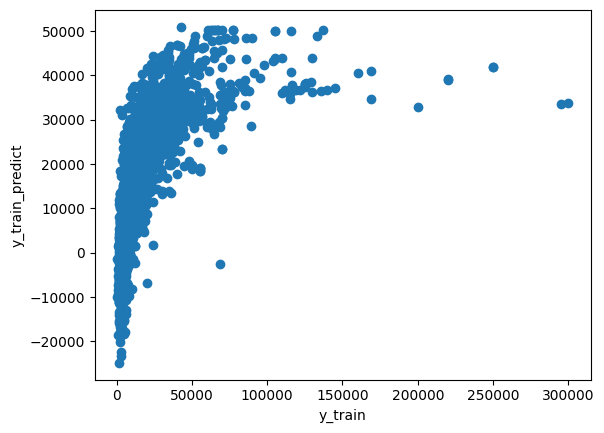

In [55]:
# Linear regression
y_train_predict = lr_model.predict(x_train)
# y_test_predict
plt.scatter(y_train,y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")
plt.show()

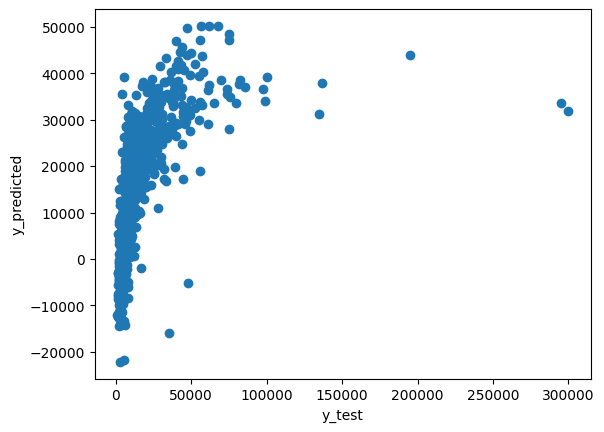

In [52]:
y_test_predict = lr_model.predict(x_test)
# y_test_predict
plt.scatter(y_test,y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

In [45]:
print(lr_model.score(x_train,y_train) *100)
print(lr_model.score(x_test,y_test) *100)

36.25140202628629
27.303837283454147


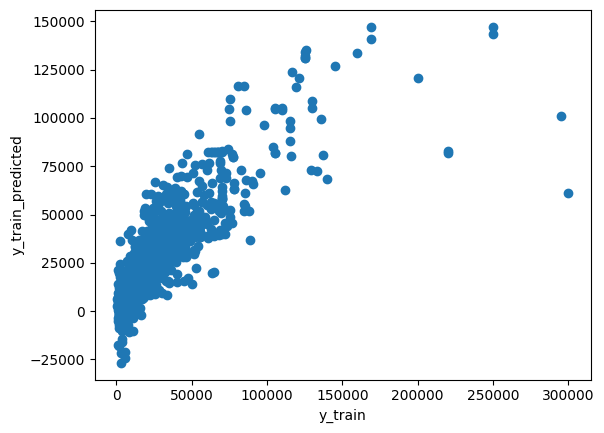

In [54]:
# polynomial regression
y_train_predict = poly_model.predict(p.fit_transform(x_train))
plt.scatter(y_train,y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predicted")
plt.show()

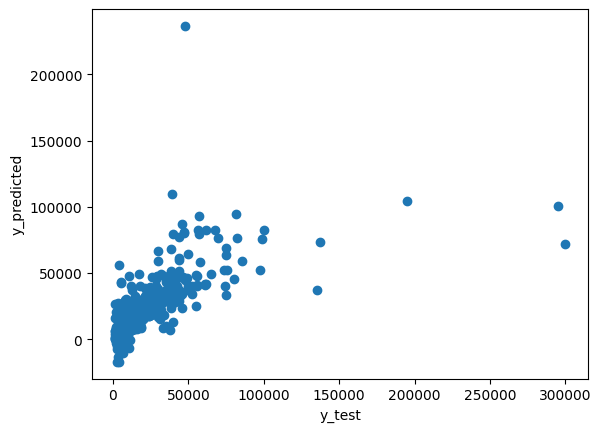

In [53]:
y_test_predict = poly_model.predict(p.fit_transform(x_test))
# y_test_predict
plt.scatter(y_test,y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

In [48]:
print(poly_model.score(p.fit_transform(x_train),y_train) *100)
print(poly_model.score(p.fit_transform(x_test),y_test) *100)

74.22389132287202
45.105730584400106
